# HTIN5005 Assignment 2

Yongjiang Shi SID: 480406628

Anthony Huynh SID: 440290409

In [1]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = '1xdRYL_tHEyIdML6F1KUGVeLkLaaf7Nfz'  # Restricted shared link
downloaded = drive.CreateFile({'id':link})
downloaded.GetContentFile('States_ILI.csv')
import pandas as pd
data_df = pd.read_csv('States_ILI.csv')

In [2]:
#import packages
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
data_df = pd.read_csv("/content/drive/MyDrive/Time_Series_Forecast_Transformer_HTIN5005_ILI/States_ILI.csv")

In [5]:
data_df

,date,AK,AL,AR,AZ,DE,GA,ID,KS,KY,...,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV
0,10/4/09,6.681128,11.714032,11.690647,5.412864,4.177719,5.756567,11.336176,7.996503,10.123320,...,6.851755,6.481481,3.687230,13.297408,6.131683,6.088217,2.616738,5.833498,4.663368,3.880303
1,10/11/09,6.766595,9.333333,15.008186,6.083715,6.565015,5.051700,11.308922,10.732660,5.202039,...,6.308213,10.096154,4.196797,12.804213,12.697060,8.912076,3.415271,8.497337,5.526189,6.785555
2,10/18/09,7.611438,7.273329,12.163600,3.839384,12.443643,5.902007,9.019844,11.286385,5.802689,...,3.897699,8.770161,3.905351,11.067298,13.828930,14.540389,7.232704,8.210526,8.418070,12.495631
3,10/25/09,7.210031,7.836504,9.673560,3.230019,9.708042,5.642044,7.393967,8.196823,4.904062,...,4.525917,5.100830,4.456052,9.377208,12.274096,14.730188,12.428198,6.835002,7.566347,14.498013
4,11/1/09,3.989242,7.175214,7.686567,3.267177,6.373463,5.468195,4.770992,6.575291,3.941984,...,3.540097,2.837838,3.255092,6.429295,9.984384,10.112995,12.583833,5.282293,7.112512,10.748838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,4/10/16,2.782071,9.000000,3.400000,2.700000,0.310000,2.190000,1.350000,2.017905,1.317606,...,1.180070,1.660907,2.468279,3.252669,1.315421,2.496762,1.434549,0.897244,1.780371,2.400000
341,4/17/16,3.557312,5.100000,3.400000,2.500000,0.330000,2.140000,0.700000,1.339812,0.853296,...,0.756564,1.413547,2.152147,3.579286,1.389450,2.617282,1.589825,0.468484,2.039784,2.600000
342,4/24/16,2.238806,4.200000,1.700000,2.100000,0.600000,1.920000,0.800000,0.941289,0.597027,...,1.069519,1.174950,2.480821,3.039303,1.470873,2.520939,1.622718,0.653457,1.649412,2.100000
343,5/1/16,2.044728,1.500000,2.800000,2.000000,0.360000,2.030000,1.370000,1.013566,0.394670,...,0.385675,1.116911,2.399909,2.749187,1.191563,2.175445,1.037037,0.847817,1.384870,1.300000


# Preproccessing


In [6]:
data_df.corr()

<ipython-input-6-b47fa4ad56a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_df.corr()


,AK,AL,AR,AZ,DE,GA,ID,KS,KY,LA,...,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV
AK,1.000000,0.545098,0.701215,0.527736,0.674405,0.608846,0.674078,0.626674,0.736261,0.672919,...,0.640639,0.672751,0.623264,0.633366,0.624346,0.711131,0.472361,0.736959,0.657548,0.673051
AL,0.545098,1.000000,0.712359,0.585756,0.446205,0.777275,0.611050,0.604820,0.637256,0.708963,...,0.725427,0.570113,0.747743,0.624985,0.501670,0.602386,0.337872,0.545288,0.581155,0.533045
AR,0.701215,0.712359,1.000000,0.721219,0.779434,0.717493,0.851938,0.898571,0.830979,0.837524,...,0.802894,0.838835,0.811522,0.836309,0.745920,0.836809,0.630959,0.841854,0.807986,0.815248
AZ,0.527736,0.585756,0.721219,1.000000,0.611378,0.503999,0.575762,0.727958,0.696232,0.591427,...,0.636975,0.754789,0.655599,0.730375,0.699055,0.656639,0.526206,0.690809,0.676314,0.627110
DE,0.674405,0.446205,0.779434,0.611378,1.000000,0.545730,0.672773,0.792629,0.733155,0.718167,...,0.598172,0.758853,0.638341,0.723386,0.838557,0.886037,0.769682,0.838729,0.753462,0.831010
GA,0.608846,0.777275,0.717493,0.503999,0.545730,1.000000,0.649508,0.624931,0.673260,0.811936,...,0.714905,0.566050,0.709515,0.672258,0.539043,0.677393,0.417142,0.625999,0.617820,0.655476
ID,0.674078,0.611050,0.851938,0.575762,0.672773,0.649508,1.000000,0.832798,0.766877,0.761491,...,0.713473,0.803551,0.709676,0.755771,0.675007,0.737646,0.572094,0.845145,0.731118,0.734147
KS,0.626674,0.604820,0.898571,0.727958,0.792629,0.624931,0.832798,1.000000,0.789730,0.793410,...,0.742085,0.817489,0.791940,0.866961,0.824605,0.866305,0.707188,0.835022,0.858585,0.836903
KY,0.736261,0.637256,0.830979,0.696232,0.733155,0.673260,0.766877,0.789730,1.000000,0.721126,...,0.808771,0.805145,0.668066,0.776461,0.724293,0.824527,0.553717,0.825391,0.767925,0.771142
LA,0.672919,0.708963,0.837524,0.591427,0.718167,0.811936,0.761491,0.793410,0.721126,1.000000,...,0.801781,0.705399,0.858582,0.834637,0.698480,0.804115,0.581645,0.746586,0.713062,0.730705


Correlation Matrix Representing Each US State

<ipython-input-7-237fe2624c2b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr())


<Axes: >

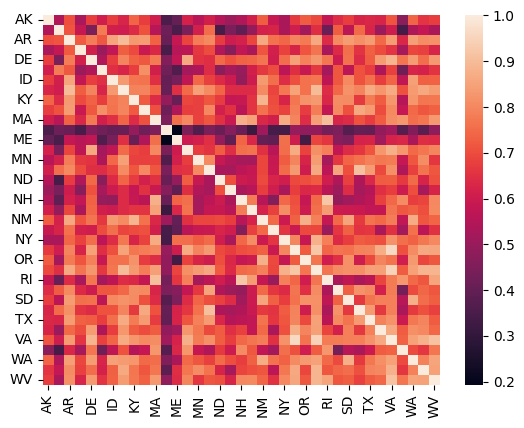

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(data_df.corr())

In [8]:
#Creating a dataframe with just
data_df = data_df[['date','AZ']]#Comment this line out, if you want to run the whole dataset
data_df

,date,AZ
0,10/4/09,5.412864
1,10/11/09,6.083715
2,10/18/09,3.839384
3,10/25/09,3.230019
4,11/1/09,3.267177
...,...,...
340,4/10/16,2.700000
341,4/17/16,2.500000
342,4/24/16,2.100000
343,5/1/16,2.000000


We partition the data with 80% of data used for training and 20% used for testing


In [9]:
data = data_df.iloc[:,1:].values
train_data = data[:-len(data)//5]
test_data = data[-len(data)//5:]

# Applying Sliding Windows Strategy

Here, we apply sliding windows to our dataset.

Sequence length represents the window size and sequence strides denotes step size.





In [10]:
sequence_length = 1
sequence_stride = 4
train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    train_data, train_data[sequence_length:], sequence_length=sequence_length, sequence_stride=sequence_stride)
test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    test_data, test_data[sequence_length:], sequence_length=sequence_length, sequence_stride=sequence_stride)


In [11]:
list(train_dataset)[0][0].shape

TensorShape([69, 1, 1])

# Building Transformer Model

Adding Q, K and V to Transformer model

In [12]:
def a_norm(Q, K):
    m = torch.matmul(Q, K.transpose(2,1).float())
    m /= torch.sqrt(torch.tensor(Q.shape[-1]).float())

    return torch.softmax(m , -1)

In [13]:
def attention(Q, K, V):
    #Attention(Q, K, V) = norm(QK)V
    a = a_norm(Q, K) #(batch_size, dim_attn, seq_length)

    return  torch.matmul(a,  V) #(batch_size, seq_length, seq_length)

In [14]:
class AttentionBlock(torch.nn.Module):
    def __init__(self, dim_val, dim_attn):
        super(AttentionBlock, self).__init__()
        self.value = Value(dim_val, dim_val)
        self.key = Key(dim_val, dim_attn)
        self.query = Query(dim_val, dim_attn)

    def forward(self, x, kv = None):
        if(kv is None):
            #Attention with x connected to Q,K and V (For encoder)
            return attention(self.query(x), self.key(x), self.value(x))

        #Attention with x as Q, external vector kv as K an V (For decoder)
        return attention(self.query(x), self.key(kv), self.value(kv))

In [15]:
class MultiHeadAttentionBlock(torch.nn.Module):
    def __init__(self, dim_val, dim_attn, n_heads):
        super(MultiHeadAttentionBlock, self).__init__()
        self.heads = []
        for i in range(n_heads):
            self.heads.append(AttentionBlock(dim_val, dim_attn))

        self.heads = nn.ModuleList(self.heads)

        self.fc = nn.Linear(n_heads * dim_val, dim_val, bias = False)


    def forward(self, x, kv = None):
        a = []
        for h in self.heads:
            a.append(h(x, kv = kv))

        a = torch.stack(a, dim = -1) #combine heads
        a = a.flatten(start_dim = 2) #flatten all head outputs

        x = self.fc(a)

        return x

In [16]:
class Value(torch.nn.Module):
    def __init__(self, dim_input, dim_val):
        super(Value, self).__init__()
        self.dim_val = dim_val

        self.fc1 = nn.Linear(dim_input, dim_val, bias = False)
        #self.fc2 = nn.Linear(5, dim_val)

    def forward(self, x):
        x = self.fc1(x)
        #x = self.fc2(x)

        return x

In [17]:
class Key(torch.nn.Module):
    def __init__(self, dim_input, dim_attn):
        super(Key, self).__init__()
        self.dim_attn = dim_attn

        self.fc1 = nn.Linear(dim_input, dim_attn, bias = False)
        #self.fc2 = nn.Linear(5, dim_attn)

    def forward(self, x):
        x = self.fc1(x)
        #x = self.fc2(x)

        return x

In [18]:
class Query(torch.nn.Module):
    def __init__(self, dim_input, dim_attn):
        super(Query, self).__init__()
        self.dim_attn = dim_attn

        self.fc1 = nn.Linear(dim_input, dim_attn, bias = False)
        #self.fc2 = nn.Linear(5, dim_attn)

    def forward(self, x):

        x = self.fc1(x)
        #print(x.shape)
        #x = self.fc2(x)

        return x

In [19]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        div_term_odd = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        div_term_even = torch.exp(torch.arange(1, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term_odd)
        pe[:, 1::2] = torch.cos(position * div_term_even)

        pe = pe.unsqueeze(0).transpose(0, 1)

        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :]. squeeze(1)
        return x

Encoder layer

In [20]:
class EncoderLayer(torch.nn.Module):
    def __init__(self, dim_val, dim_attn, n_heads = 1):
        super(EncoderLayer, self).__init__()
        self.attn = MultiHeadAttentionBlock(dim_val, dim_attn , n_heads)
        self.fc1 = nn.Linear(dim_val, dim_val)
        self.fc2 = nn.Linear(dim_val, dim_val)

        self.norm1 = nn.LayerNorm(dim_val)
        self.norm2 = nn.LayerNorm(dim_val)

    def forward(self, x):
        a = self.attn(x)
        x = self.norm1(x + a)

        a = self.fc1(F.elu(self.fc2(x)))
        x = self.norm2(x + a)

        return x

Decoder Layer

In [21]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, dim_val, dim_attn, n_heads = 1):
        super(DecoderLayer, self).__init__()
        self.attn1 = MultiHeadAttentionBlock(dim_val, dim_attn, n_heads)
        self.attn2 = MultiHeadAttentionBlock(dim_val, dim_attn, n_heads)
        self.fc1 = nn.Linear(dim_val, dim_val)
        self.fc2 = nn.Linear(dim_val, dim_val)

        self.norm1 = nn.LayerNorm(dim_val)
        self.norm2 = nn.LayerNorm(dim_val)
        self.norm3 = nn.LayerNorm(dim_val)

    def forward(self, x, enc):
        a = self.attn1(x)
        x = self.norm1(a + x)

        a = self.attn2(x, kv = enc)
        x = self.norm2(a + x)

        a = self.fc1(F.elu(self.fc2(x)))

        x = self.norm3(x + a)
        return x

Defining Transformer Model

In [22]:
class Transformer(torch.nn.Module):
    def __init__(self, dim_val, dim_attn, input_size, dec_seq_len, out_seq_len, n_decoder_layers = 1, n_encoder_layers = 1, n_heads = 1):
        super(Transformer, self).__init__()
        self.dec_seq_len = dec_seq_len

        #Initiate encoder and Decoder layers
        self.encs = nn.ModuleList()
        for i in range(n_encoder_layers):
            self.encs.append(EncoderLayer(dim_val, dim_attn, n_heads))

        self.decs = nn.ModuleList()
        for i in range(n_decoder_layers):
            self.decs.append(DecoderLayer(dim_val, dim_attn, n_heads))

        self.pos = PositionalEncoding(dim_val)

        #Dense layers for managing network inputs and outputs
        self.enc_input_fc = nn.Linear(input_size, dim_val)
        self.dec_input_fc = nn.Linear(input_size, dim_val)
        self.out_fc = nn.Linear(dec_seq_len * dim_val, out_seq_len)

    def forward(self, x):
        #encoder
        e = self.encs[0](self.pos(self.enc_input_fc(x)))
        for enc in self.encs[1:]:
            e = enc(e)

        #decoder
        d = self.decs[0](self.dec_input_fc(x[:,-self.dec_seq_len:]), e)
        for dec in self.decs[1:]:
            d = dec(d, e)

        #output
        x = self.out_fc(d.flatten(start_dim=1))

        return x

# Hyperparameter


In [23]:
dec_seq_len = 1
output_sequence_length = 1

dim_val = 60
dim_attn = 5
lr = 0.002
epochs = 100

n_heads = 1

n_decoder_layers = 1
n_encoder_layers = 1

# Training and Test on the Transformer Model

Running Tranformer Model

100%|██████████| 100/100 [00:30<00:00,  3.30it/s]


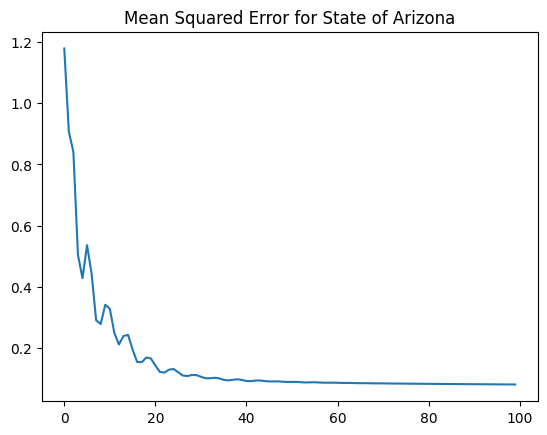

In [24]:
#initializing network and optimizer
t = Transformer(dim_val, dim_attn, 1,dec_seq_len,  output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads)
optimizer = torch.optim.Adam(t.parameters(), lr=lr)

#keep track of loss for graph, which
losses = []
#build live matplotlib fig
fig = plt.figure()

ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for e in tqdm(range(epochs)):
    out = []
    e_losses = []
    for b in train_dataset:
        optimizer.zero_grad()
        X, Y = b
        X = torch.tensor(X.numpy(), dtype=torch.float32)
        Y = torch.tensor(Y.numpy(), dtype=torch.float32)
        #Forward pass and calculate loss
        net_out = t(X)
        loss = torch.mean((net_out - Y) ** 2)

        #backwards pass
        loss.backward()
        optimizer.step()

        #Track losses and draw rgaph
        out.append([net_out.detach().numpy(), Y])
        e_losses.append(float(loss.detach().numpy()))
    losses.append(np.array(e_losses).mean())
    ax.clear()
    ax.plot(losses)
    ax.set_title("Mean Squared Error for State of Arizona")
    fig.canvas.draw()


Final MSE for Train Data

In [25]:
losses[-1]

0.08186154812574387

Final MSE for Test Data

In [26]:
t.eval()
test_outputs = []
test_losses = []
test_true = []
for b in test_dataset:
    optimizer.zero_grad()
    X, Y = b
    X = torch.tensor(X.numpy(), dtype=torch.float32)
    Y = torch.tensor(Y.numpy(), dtype=torch.float32)
    #Forward pass and calculate loss
    net_out = t(X)
    loss = torch.mean((net_out - Y) ** 2)

    #Track losses and draw rgaph
    test_outputs.extend(net_out.detach().numpy().tolist())
    test_true.extend(Y.detach().numpy().tolist())
    test_losses.append(float(loss.detach().numpy()))
test_outputs = np.array(test_outputs)
test_true = np.array(test_true)
np.array(test_losses).mean()#MSE for Test data


0.09382370114326477

RMSE for Test Data

In [27]:
np.array(test_losses).mean() ** 0.5#RMSE for Test data

0.3063065476663285

In [28]:
test_outputs.shape

(17, 1)

In [29]:
test_true.shape

(17, 1)

# Pearson's Correlation

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(test_true, test_outputs)#Pearson Correlation

0.9408428335083692

In [32]:
test_true

array([[3.55294204],
       [2.30472636],
       [1.26639533],
       [1.21808612],
       [1.18112183],
       [0.80463791],
       [0.64733297],
       [0.82493126],
       [1.07018411],
       [0.5       ],
       [2.20000005],
       [2.9000001 ],
       [2.20000005],
       [3.        ],
       [5.4000001 ],
       [3.0999999 ],
       [2.5       ]])

In [33]:
test_outputs

array([[3.50614262],
       [2.31236434],
       [1.57138598],
       [1.23869669],
       [1.11829698],
       [0.94253772],
       [0.66422915],
       [0.82988065],
       [1.13350534],
       [0.72635651],
       [2.08737159],
       [2.08737159],
       [2.59238195],
       [2.68053293],
       [4.70541239],
       [3.04671001],
       [2.4198432 ]])